In this notebook, we'll examine the UCI electricity demand dataset (see [here][0]), and set up a dataframe that can be used for time series prediction testing. 

[0]:https://archive.ics.uci.edu/dataset/321/electricityloaddiagrams20112014

Note that this notebook is for documentation only, the model data can be updated by running `zero-time-series-demo prep ----model-data-pipeline`

In [1]:
%load_ext autoreload
%autoreload 2

# Load Data

In [2]:
from zero_ts_demo.imports import *
from zero_ts_demo import helpers as hp
from zero_ts_demo.load_data import load_model_data

In [3]:
MODEL_DATA = load_model_data()
df = MODEL_DATA.copy()
df.head()

,mt_004,mt_005,mt_006,mt_007,mt_009,mt_010,mt_011,mt_013,mt_014,mt_015,...,mt_360,mt_361,mt_362,mt_363,mt_364,mt_365,mt_366,mt_367,mt_368,mt_370
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Prophet

In [4]:
from zero_ts_demo import models as md
from copy import deepcopy as copy
from zero_ts_demo.models import ProphetModel

tail = 1000
cols = pd.Series(df.columns).sample(15).tolist()

graphs = dict()
models = dict()

/home/zero/miniconda3/envs/prophet-early-leather/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


06:56:19 - cmdstanpy - INFO - Chain [1] start processing
06:56:19 - cmdstanpy - INFO - Chain [1] done processing


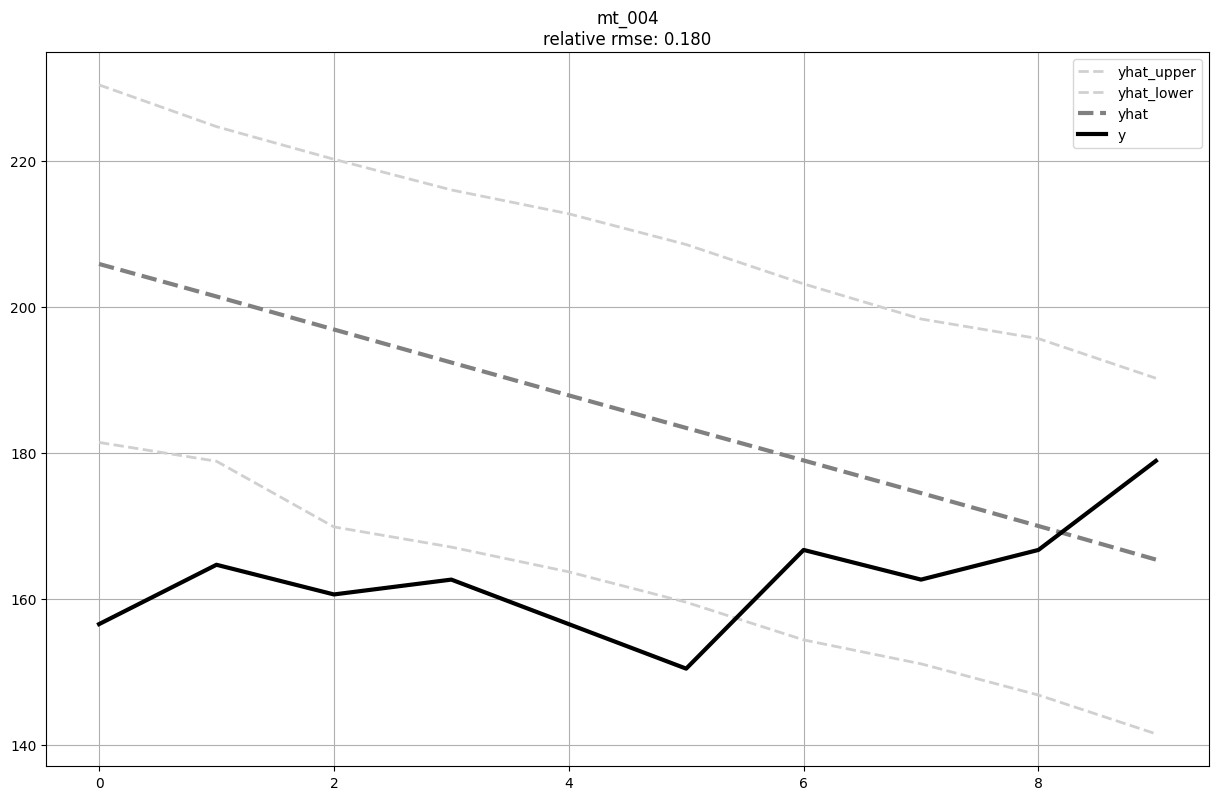

In [5]:
col = df.columns[0]
sl_train, sl_test = md.train_test(MODEL_DATA, col, tail=tail)
model = ProphetModel(sl_train=sl_train, sl_test=sl_test, title=col)
model.fit_predict()
fig = model.plot_preds()
fig

In [6]:
# fit model for a selection of columns
for col in cols:
    sl_train, sl_test = md.train_test(MODEL_DATA, col, tail=tail)
    model = ProphetModel(sl_train=sl_train, sl_test=sl_test, title=col)
    model.fit_predict()
    fig = model.plot_preds()
    models[col] = copy(model)
    graphs[col] = fig

06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:20 - cmdstanpy - INFO - Chain [1] done processing
06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:20 - cmdstanpy - INFO - Chain [1] done processing
06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:20 - cmdstanpy - INFO - Chain [1] done processing
06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:20 - cmdstanpy - INFO - Chain [1] done processing
06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:20 - cmdstanpy - INFO - Chain [1] done processing
06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:20 - cmdstanpy - INFO - Chain [1] done processing
06:56:20 - cmdstanpy - INFO - Chain [1] start processing
06:56:21 - cmdstanpy - INFO - Chain [1] done processing
06:56:21 - cmdstanpy - INFO - Chain [1] start processing
06:56:21 - cmdstanpy - INFO - Chain [1] done processing
06:56:21 - cmdstanpy - INFO - Chain [1] start processing
06:56:21 - cmdstanpy - INFO - Chain [1]

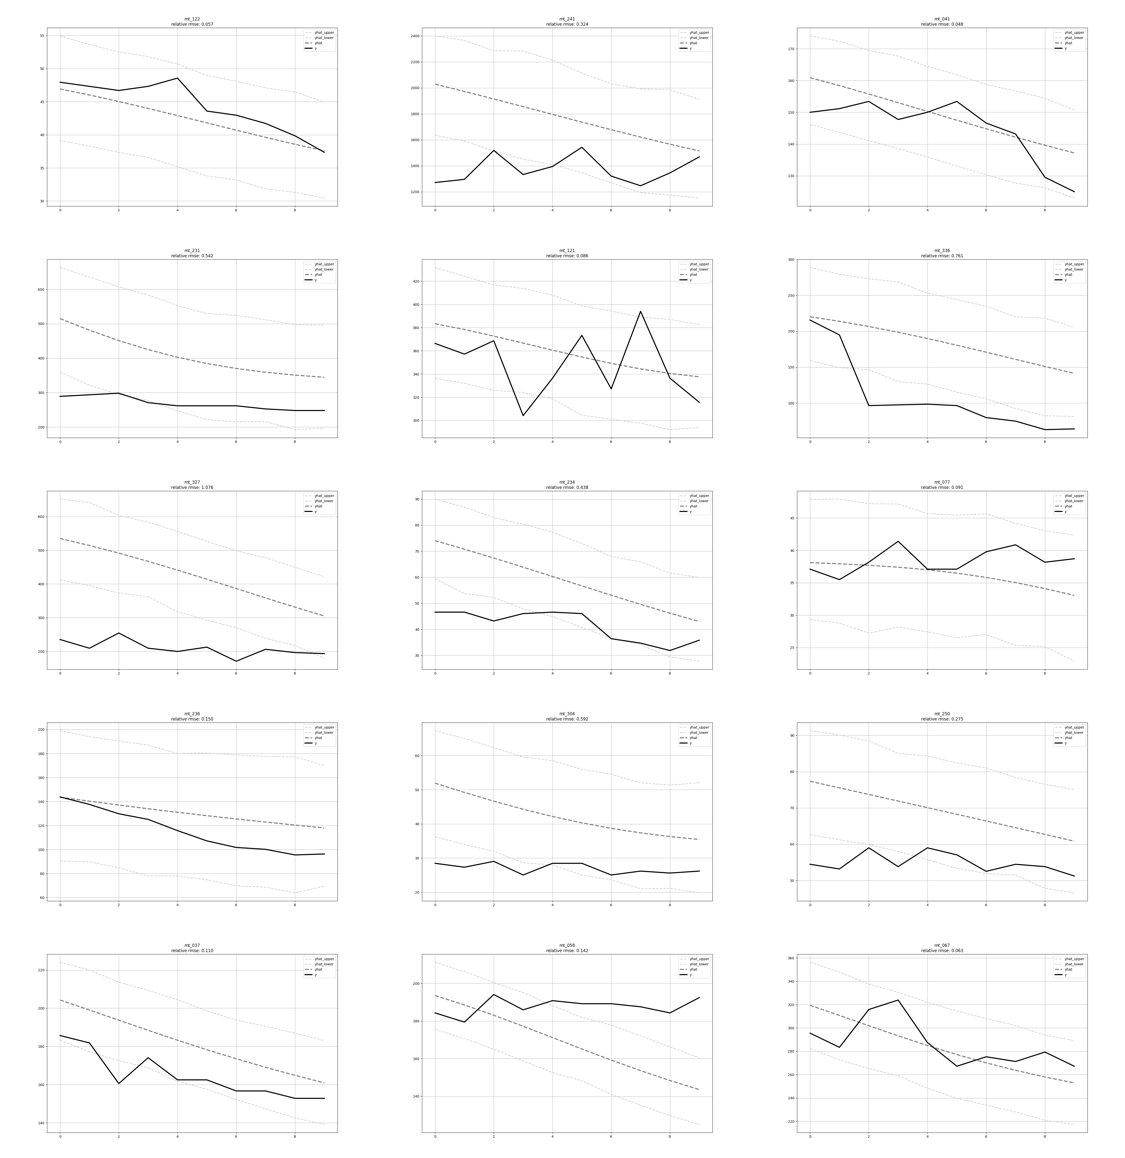

In [24]:
fig = hp.create_image_grid(list(graphs.values()), cols=3, rows=5, resize=0.25)
fig

In [16]:
x = hp.fig_to_pil(fig)
x.size

(1500, 927)

# Scratchpad

In [ ]:
from matplotlib import pyplot as plt

w = 15
fs = (w, w/1.618)
fig, ax = plt.subplots(figsize=fs)

for col in ['yhat_upper', 'yhat_lower']:
    ax.plot(preds.index, preds[col], label=col, ls='--', color='#d0d0d0', linewidth=2)
ax.plot(preds.index, preds['yhat'], label='yhat', ls='--', color='grey', linewidth=3)
ax.plot(preds.index, preds['y'], label='y', ls='solid', color='black', linewidth=3)

plt.legend()
plt.grid()
plt.show()

In [ ]:
col = df.columns[0]
sl_train, sl_test = md.train_test(MODEL_DATA, col, tail=0)
print(sl_train.shape)